In [1]:
import pandas as pd
from config.experiment_config import ExperimentConfig

In [2]:
daily_transf = pd.read_csv("Daily_Fixed_Transf_results_20.csv").set_index("datetime")
daily_mlp = pd.read_csv("Daily_Fixed_MLP_results_20.csv").set_index("datetime")

In [3]:
import numpy as np
from sklearn.metrics import root_mean_squared_error


def get_rmse(result: pd.DataFrame, model_name: str, baseline_name: str) -> pd.DataFrame:
    rmse = []
    for date, row in result.iterrows():
        true_vols = np.fromstring(row.true_vols.strip("[]").replace("\n", " "), sep=" ")
        model_preds = np.fromstring(
            row.model_preds.strip("[]").replace("\n", " "), sep=" "
        )
        baseline_preds = np.fromstring(
            row.baseline_preds.strip("[]").replace("\n", " "), sep=" "
        )

        # print(model_preds)
        # print(baseline_preds)
        rmse.append(
            [
                date,
                root_mean_squared_error(true_vols, model_preds),
                root_mean_squared_error(true_vols, baseline_preds),
            ]
        )

    return pd.DataFrame(rmse, columns=["date", model_name, baseline_name]).set_index(
        "date"
    )

In [4]:
daily_transf_rmse = get_rmse(daily_transf, "Transformer", "LSTM")
daily_mlp_rmse = get_rmse(daily_mlp, "MLP", "Naive")
results = pd.concat([daily_transf_rmse, daily_mlp_rmse], axis=1)
results

,Transformer,LSTM,MLP,Naive
date,,,,
2018-06-30,0.664628,0.000222,12.462622,0.000096
2018-07-03,0.000061,0.000182,1.824474,0.000007
2018-07-04,10.134413,0.000194,0.000185,0.000128
2018-07-05,0.000049,0.000121,172.825729,0.000094
2018-07-06,0.000080,0.000120,3.914355,0.000131
...,...,...,...,...
2018-09-26,0.000056,0.000026,74.125560,0.000064
2018-09-27,0.665776,0.000067,0.000097,0.000078
2018-09-28,0.000094,0.000096,3.544484,0.000091


In [5]:
results.mean(axis=0)

Transformer     0.901458
LSTM            0.000154
MLP            43.900082
Naive           0.000150
dtype: float64

In [9]:
mu = results.mean(axis=0).to_frame()


def represent_as_html(df: pd.DataFrame) -> str:
    return df.style.format({var: "{:,.8%}".format for var in df.columns})

In [10]:
represent_as_html(mu)

,0
Transformer,90.14583819%
LSTM,0.01537877%
MLP,"4,390.00820820%"
Naive,0.01501475%


In [11]:
std = results.std(axis=0).to_frame()
represent_as_html(std)

,0
Transformer,253.56031412%
LSTM,0.01804785%
MLP,"18,048.04078280%"
Naive,0.01666490%


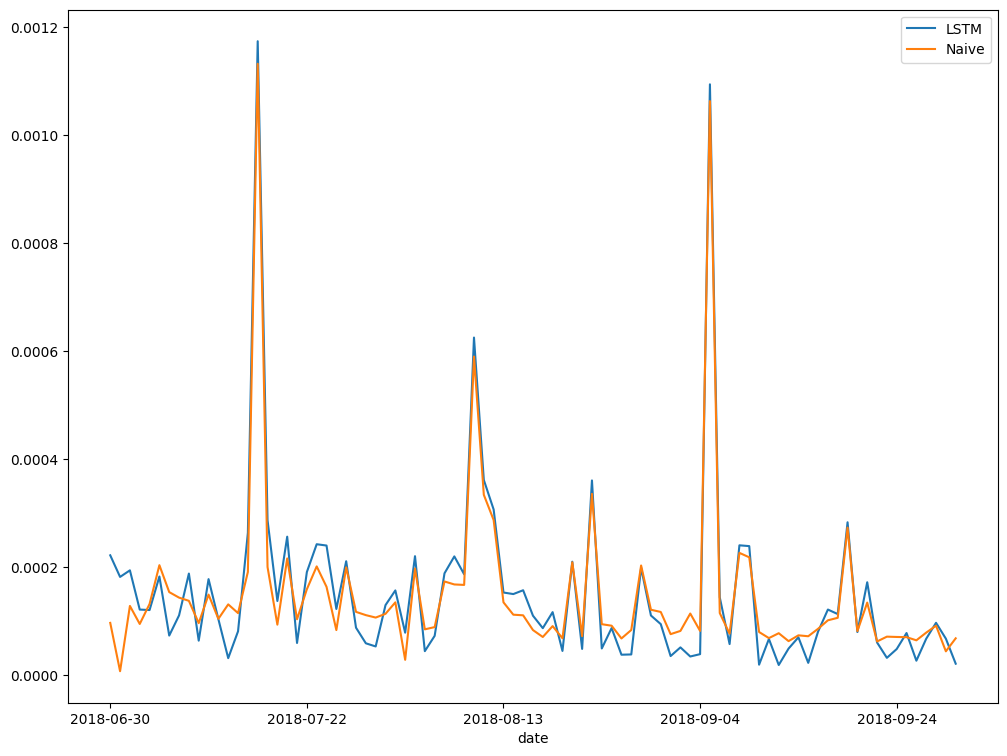

In [12]:
results[["LSTM", "Naive"]].plot(figsize=(12, 9));

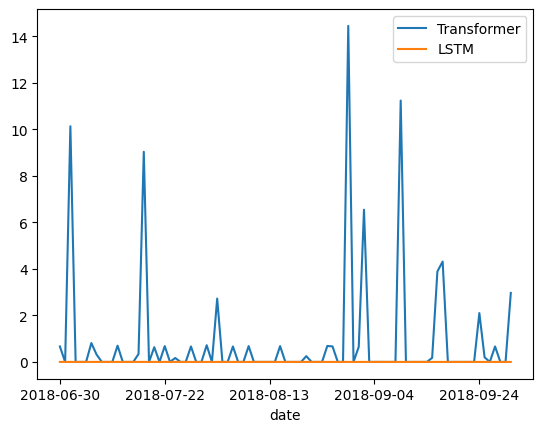

In [7]:
results[["Transformer", "LSTM"]].plot();

In [1]:
from config.model_config import ModelConfig

model_config = ModelConfig()
experiment_config = ExperimentConfig()

data = pd.read_csv(experiment_config.PATH_DATA / experiment_config.DATASET.value)
data["datetime"] = pd.to_datetime(data["datetime"])
data = data.sort_values(by="datetime")
data = data.set_index("datetime")
data.index = data.index.tz_localize(None)

NameError: name 'pd' is not defined

In [14]:
data.shape

(2579, 1214)

In [15]:
data.index.min(), data.index.max()

(Timestamp('2018-06-04 23:00:00'), Timestamp('2018-09-30 21:00:00'))